In [21]:
import numpy as np
import pandas as pd
from pathlib import Path
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance


from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
pd.set_option('display.max_colwidth', None)

np.random.seed(0)

In [22]:
data_dir = Path('./Data_Files')

In [23]:
# Params
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [24]:
df1 = pd.read_csv(data_dir / "+60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df2 = pd.read_csv(data_dir / "0degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df3 = pd.read_csv(data_dir / "16cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df4 = pd.read_csv(data_dir / "180.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df5 = pd.read_csv(data_dir / "32cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df6 = pd.read_csv(data_dir / "80cm_away.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df7 = pd.read_csv(data_dir / "air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df8 = pd.read_csv(data_dir / "minus_60degrees.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df9 = pd.read_csv(data_dir / "no_air_.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df10 = pd.read_csv(data_dir / "vent_air.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)
df11 = pd.read_csv(data_dir / "very_close_to_vent.csv", low_memory=False, names= ['frequency','amplitude'] , index_col = False)

In [25]:
df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])
df

,frequency,amplitude
0,0,17959.1616
1,NaN,NaN
2,62.5,14926.8584
3,NaN,NaN
4,125,8456.3285
...,...,...
19232,7875,5.4267
19233,NaN,NaN
19234,7937.5,7.2022
19235,NaN,NaN


In [26]:
df = df.dropna()
df

,frequency,amplitude
0,0,17959.1616
2,62.5,14926.8584
4,125,8456.3285
6,187.5,1466.4065
8,250,1123.9574
...,...,...
19228,7750,1.7688
19230,7812.5,8.8807
19232,7875,5.4267
19234,7937.5,7.2022


In [27]:
def convert(df: pd.DataFrame, frame_size=129):
    x = np.asarray(df.iloc[:, 1]).reshape(-1, frame_size)
#     x = x[x.shape[0]//10:-x.shape[0]//10]
    return x

In [28]:
# df = df[df.columns[1:2]]
df

,frequency,amplitude
0,0,17959.1616
2,62.5,14926.8584
4,125,8456.3285
6,187.5,1466.4065
8,250,1123.9574
...,...,...
19228,7750,1.7688
19230,7812.5,8.8807
19232,7875,5.4267
19234,7937.5,7.2022


In [29]:
data = convert(df)
data.shape

(706, 129)

In [30]:
X = data[:,:-1]
X.shape

(706, 128)

In [31]:
y = data[:, -1]
y.shape
# print(y)

(706,)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [34]:
y_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

In [35]:
print(y_pred[:5])
print(y_test[:5])

[11.35020701 20.35068646  9.43263534  6.57891724 20.83489857]
[10.38 19.79  6.54  5.65 20.82]


In [36]:
print(y_train_pred[:5])
print(y_train[:5])

[ 7.5365158  21.60006277 21.61756365  5.71347511 20.24884169]
[ 8.17 21.88 20.56  4.58 20.3 ]


In [39]:
print("MSE of test: ", mean_squared_error(y_test, y_pred))

MSE of test:  7.36298845497354


In [38]:
print("MSE of training: ",  mean_squared_error(y_train, y_train_pred))

MSE of training:  0.5995851973910441


Text(0.5, 1.0, 'Estimating Airflow (XGBoost)')

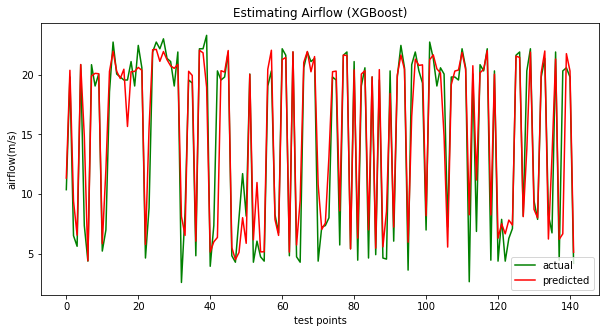

In [43]:
plt.figure(figsize=(10,5))
plt.plot(y_test, 'g', label="actual")
plt.plot(y_pred, 'r', label="predicted")
plt.legend()
plt.xlabel("test points")
plt.ylabel("airflow(m/s)")
plt.title("Estimating Airflow (XGBoost)")